In [168]:
import numpy as np
import matplotlib.pyplot as plt
import math

# (a)

In [169]:
X = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1], [4.5, 2.3],
    [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0], [8.0, 0.5], [7.5, 0.8],
    [8.1, -0.1], [2.5, 3.5], [1.0, 3.0], [4.5, -1.0], [3.0, -0.5], [5.1, -0.2],
    [6.0, -1.5], [3.5, -0.1], [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3],
    [5.8, 0.6]
])

u1 = [3.0,3.0]
u2 = [2.0,2.0]

centroids = np.array([u1,u2])
centroids_initial = centroids.copy()
centroids1 = np.array([[1,3],[4,5]])

print(centroids-centroids1)

[[ 2.  0.]
 [-2. -3.]]


In [170]:
clusters = np.zeros(24)
clusters

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [171]:
def plot_clusters(X, centroids, clusters, title="Clusters"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='plasma', s=50, alpha=0.7, label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.grid(True)
    plt.show()


In [172]:

def euclidean_distance(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

def kmeans_algo(X,centroids,max_iter,convergence_threshold):
    n_x = X.shape[0]
    clusters = np.zeros(n_x,dtype=int)
    k = centroids.shape[0]
    old_centroids = centroids.copy()
    initial_clusters = []

    for o in range(max_iter):
        for i in range(n_x):
            p1 = X[i]
            dist = float('inf')
            for j in range(len(centroids)):
                d_c = euclidean_distance(p1,centroids[j])
                if(d_c<dist):
                    dist = d_c
                    clusters[i] = j
        if(o==0):
            # plot_clusters(X,centroids,clusters,"Initial clusters")
            initial_clusters = clusters.copy()
            # print(clusters)
        for j in range(k):
            p_cluster = X[clusters == j]
            if(p_cluster.size>0):
                centroids[j] = p_cluster.mean(axis=0)

        if np.linalg.norm(centroids - old_centroids) < convergence_threshold:
            print("Converged after {} iterations".format(o+1))
            return centroids,clusters, initial_clusters
        old_centroids = centroids.copy()
    print("Did not converge after {} iterations".format(max_iter))
    return centroids, clusters, initial_clusters
                

In [173]:
final_centroids,clusters,initial_clusters = kmeans_algo(X,centroids,100,1e-4)

Converged after 3 iterations


# (b)

In [174]:
final_centroids

array([[ 5.8       ,  2.125     ],
       [ 4.2       , -0.05555556]])

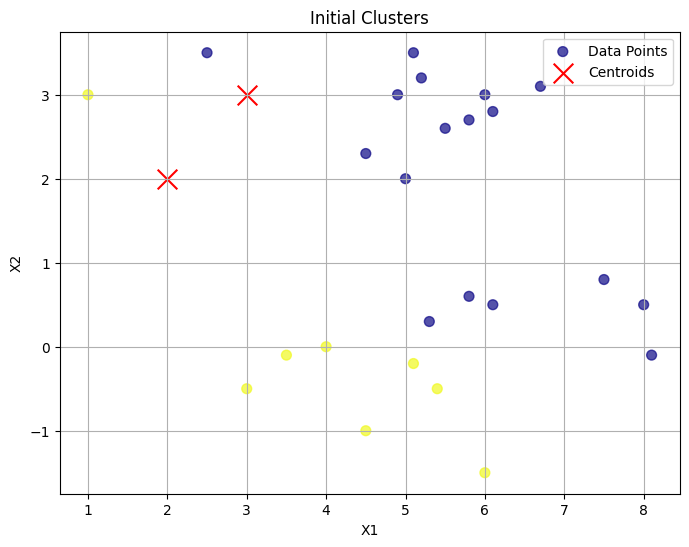

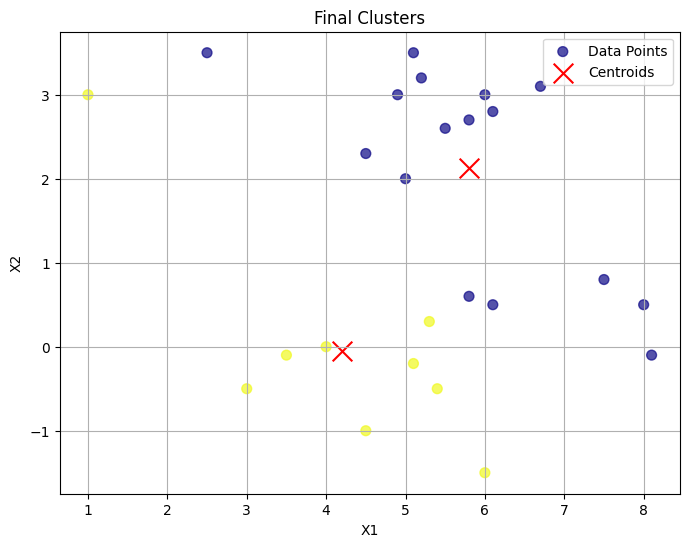

In [175]:
plot_clusters(X, centroids_initial, initial_clusters, title="Initial Clusters")
plot_clusters(X, final_centroids, clusters, title="Final Clusters")

In [176]:
final_centroids,clusters

(array([[ 5.8       ,  2.125     ],
        [ 4.2       , -0.05555556]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0]))

# (c)

In [177]:
random_centroids = []
for i in range(2):
    random_centroids.append(X[np.random.choice(X.shape[0])])
# random_centroids = np.array([[3.0, 3.0], [2.0, 2.0]])
random_centroids = np.array(random_centroids)
random_centroids_initial = random_centroids.copy()
final_centroids_random,clusters_random , initial_clusters_random = kmeans_algo(X,random_centroids,100,1e-4)

Converged after 4 iterations


In [178]:
final_centroids_random

array([[ 4.85833333,  2.89166667],
       [ 5.56153846, -0.09230769]])

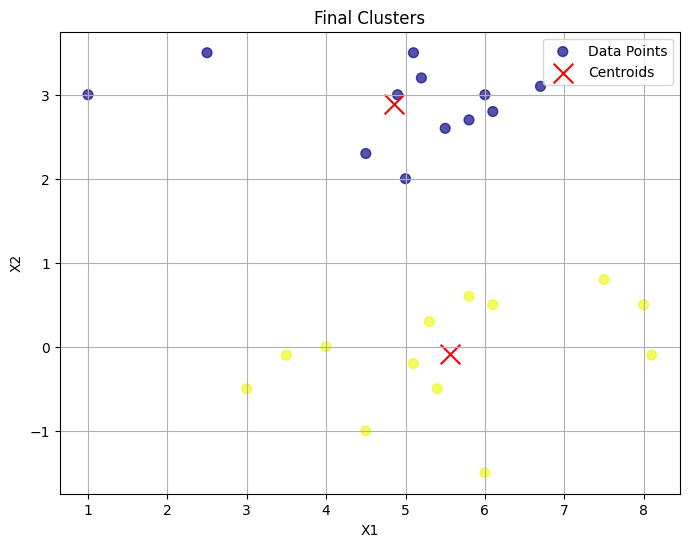

In [179]:
plot_clusters(X, final_centroids_random, clusters_random, title="Final Clusters")

# (d)

In [180]:
X.shape

(25, 2)

Converged after 2 iterations
Converged after 2 iterations
Converged after 3 iterations
Converged after 4 iterations
Converged after 4 iterations
Converged after 7 iterations
Converged after 3 iterations
Converged after 4 iterations
Converged after 5 iterations
Converged after 2 iterations


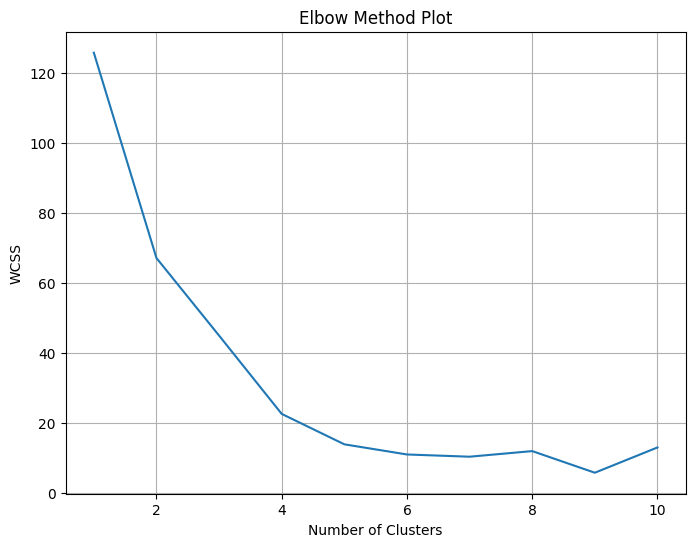

In [183]:
def random_centroids(X,k):
    l = []
    # seed = 42
    # np.random.seed(seed)
    for i in range(k):
        l.append(X[np.random.choice(X.shape[0],replace=False)])
    return np.array(l)

def elbow_method(X,max_k):
    n_x = X.shape[0]
    wcss = [0]*(max_k)
    for k in range(1,max_k+1):
        centroids = random_centroids(X,k)
        centroids,clusters,_ = kmeans_algo(X,centroids,100,1e-4)
        for i in range(n_x):
            wcss[k-1] += euclidean_distance(X[i],centroids[clusters[i]])**2
    return wcss

def plot_elbow(X,max_k):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1,max_k+1),wcss)
    plt.title("Elbow Method Plot")
    plt.xlabel("Number of Clusters")
    plt.ylabel("WCSS")
    plt.grid(True)
    plt.show()


max_k = 10
wcss = elbow_method(X,max_k)
plot_elbow(X,max_k)

In the plot after running the algorithm again and again, I noticed that the value of M (optimal number of clusters) is 4

Converged after 6 iterations


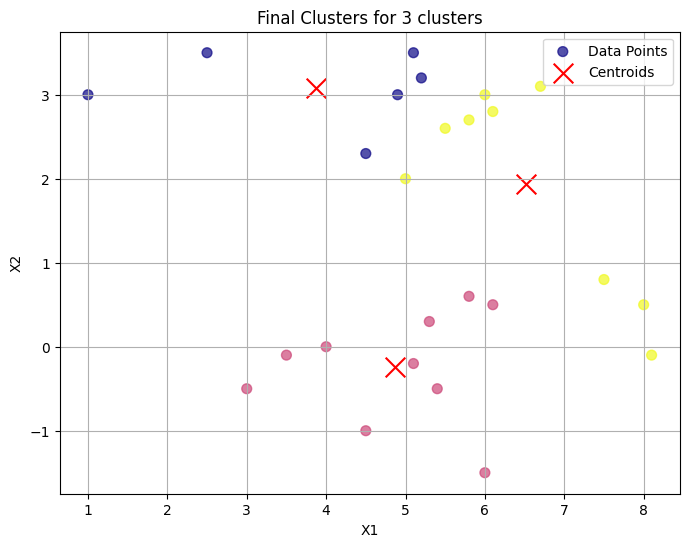

Converged after 3 iterations


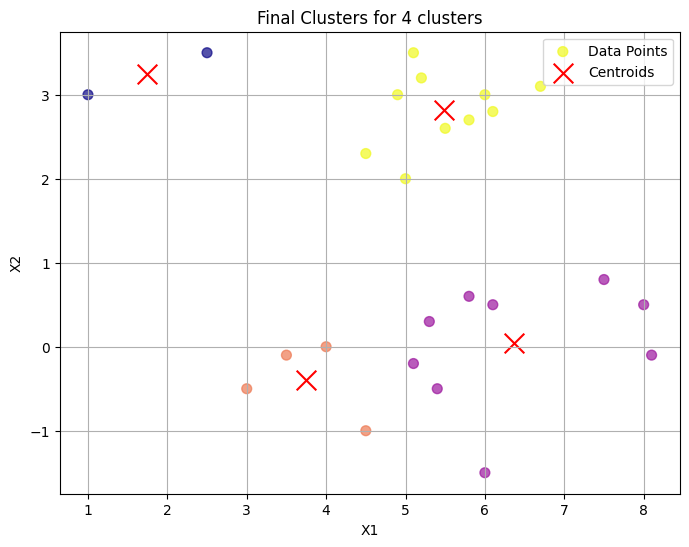

Converged after 4 iterations


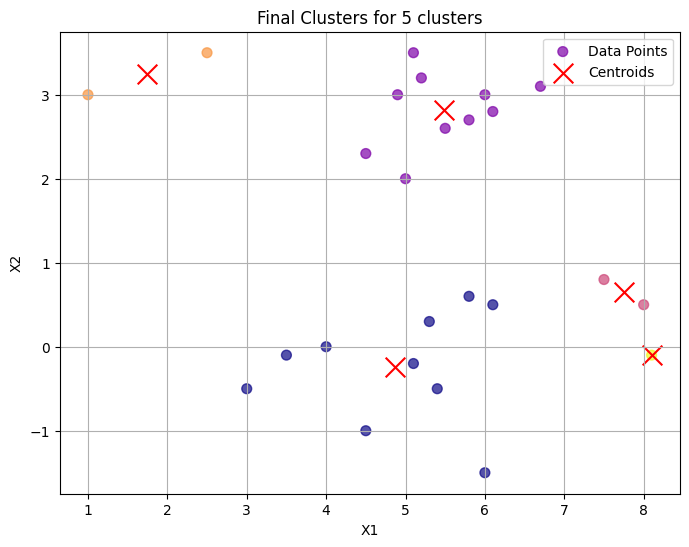

In [182]:
centroids = random_centroids(X,3)
final_centroids,clusters,initial_clusters = kmeans_algo(X,centroids,100,1e-4)
plot_clusters(X, final_centroids, clusters, title="Final Clusters for 3 clusters")

centroids = random_centroids(X,4)
final_centroids,clusters,initial_clusters = kmeans_algo(X,centroids,100,1e-4)
plot_clusters(X, final_centroids, clusters, title="Final Clusters for 4 clusters")

centroids = random_centroids(X,5)
final_centroids,clusters,initial_clusters = kmeans_algo(X,centroids,100,1e-4)
plot_clusters(X, final_centroids, clusters, title="Final Clusters for 5 clusters")